# Poor mood analysis

This is an analysis to understand the correlation and probable prediction of bad mood related with time spend watching a screen. 

Table of contents:
1. Data cleaning and transformation
2. Model Creation
    - Data visualization
3. Interpreation of results
4. Personal opinion

In [50]:
import pandas as pd
import numpy as np

## 1. Data cleaning and transformation

In [51]:
data = pd.read_excel("~/Downloads/IMT 570 Tableau Exercise avg time online (1).xlsx")
data.head()

,County,Region,State,Screen time hours,Poor mood percent of time
0,Shelby,South,Alabama,8.0,0.176
1,Lee,South,Alabama,8.0,0.176
2,Elmore,South,Alabama,8.0,0.176
3,Tuscaloosa,South,Alabama,8.0,0.176
4,Madison,South,Alabama,8.0,0.176


In [52]:
# Cleaning
data.isna().sum()

County                       0
Region                       0
State                        0
Screen time hours            2
Poor mood percent of time    2
dtype: int64

In [53]:
data.shape

(3141, 5)

In [54]:
data = data.dropna()

In [55]:
data.shape

(3139, 5)

In [56]:
data.describe()

,Screen time hours,Poor mood percent of time
count,3139.000000,3139.000000
mean,6.005097,0.132626
std,2.132028,0.054873
min,1.000000,0.000000
25%,5.000000,0.083000
50%,6.000000,0.129000
75%,7.000000,0.176000
max,14.000000,0.338000


In [57]:
data.columns = data.columns.str.replace(' ', '_')

In [58]:
data

,County,Region,State,Screen_time_hours,Poor_mood_percent_of_time
0,Shelby,South,Alabama,8.0,0.176
1,Lee,South,Alabama,8.0,0.176
2,Elmore,South,Alabama,8.0,0.176
3,Tuscaloosa,South,Alabama,8.0,0.176
4,Madison,South,Alabama,8.0,0.176
...,...,...,...,...,...
3136,Fremont,West,Wyoming,7.0,0.152
3137,Goshen,West,Wyoming,7.0,0.152
3138,Platte,West,Wyoming,7.0,0.152
3139,Washakie,West,Wyoming,7.0,0.152


## 2. Model creation

In [63]:
# Pearson correlation coefficient
from sklearn.feature_selection import r_regression

X = data[["Screen_time_hours"]]
y = data["Poor_mood_percent_of_time"]

_r = r_regression(X, y)
print(f'This is the pearson correlation coefficient {_r} between Screen time hours and poor mood percent of time telling us there is a high positive correlation between the variables')

This is the pearson correlation coefficient [0.86741439] between Screen time hours and poor mood percent of time telling us there is a high positive correlation between the variables


In [64]:
# Regression analysis

import statsmodels.formula.api as smf
m = smf.ols("Poor_mood_percent_of_time ~ Screen_time_hours", data=data).fit()

summary = m.summary()
print(m.summary())

                                OLS Regression Results                               
Dep. Variable:     Poor_mood_percent_of_time   R-squared:                       0.752
Model:                                   OLS   Adj. R-squared:                  0.752
Method:                        Least Squares   F-statistic:                     9533.
Date:                       Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                               11:29:36   Log-Likelihood:                 6849.1
No. Observations:                       3139   AIC:                        -1.369e+04
Df Residuals:                           3137   BIC:                        -1.368e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

### Regression analysis
p-value -> 0.000 <br>
Beta -> 0.0223 <br>
r_squared -> .752 <br>

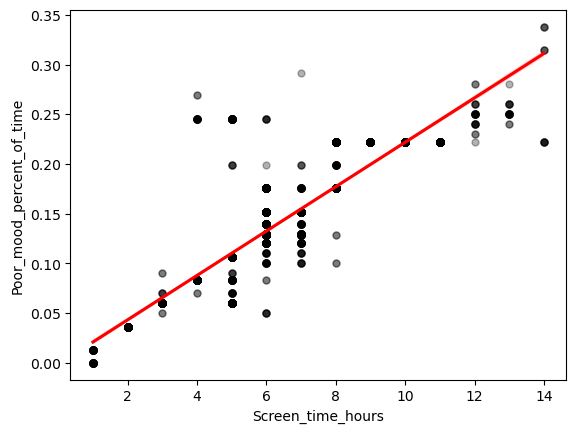

In [61]:
# Visualization of data

import seaborn as sns

_ = sns.regplot(x="Screen_time_hours", y = "Poor_mood_percent_of_time", 
                scatter_kws = {"color":"black", "s":25, "alpha":0.3}, 
                line_kws = {"color":"red"}, data=data )


## Interpretation of results
For our analysis the r_squared is .75 which tells us that 75% of the percentage of time having poor mood variancce is explained by the amount of time in hours a person stares at the screen. We also see a p-value of 0 which tells us that we can reject the null hypothesis and assure that screen time hours have a statistically significant impact on the poor mood of a person. 

## Personal opinion
I will assume this is data of people staring at a computer screen. I think this is a great model to predict the mood of the people who spend time using the computer. I would just like to know where the data is coming from and for what type of population it is aiming for. The p_value is too low and makes me want to try again with other data sample. In the end this is a good model to advise people on taking breaks and try to not watch a screen for a long time. I would also like to gather data on the task the participants are performing while staring at the screen. This because maybe too much time spent on a screen might be due to the participants being working which can cause stress and bad mood to plenty of people. Another factor to take in consideration is "age" which tells us about the type of activities and obligations they have during the day which can cause poor mood too. Lastly I would also like to track the place where the participant is. These data should be gathered depending on the purpose of the research or model. 